In [144]:
import numpy as np
    

In [145]:
import matplotlib.pyplot as plt

In [146]:
import cv2

In [5]:
image2=cv2.imread("C:\\Users\\shrey\\Downloads\\our pic 2.jpg")
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

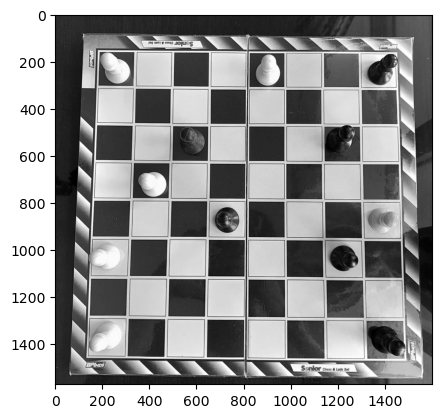

In [6]:
plt.imshow(image2,cmap='gray')

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming image2 is already loaded and is a grayscale image

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(image2, (5, 5), 0)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

# Find contours
contours, hierarchy = cv2.findContours(adaptive_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out the largest contour (the outer border)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[1:]

# Find the contour with the largest area among the inner contours
if contours:
    max_contour = max(contours, key=cv2.contourArea)

    # Approximate the contour to a polygon and get its four corners
    epsilon = 0.02 * cv2.arcLength(max_contour, True)
    approx = cv2.approxPolyDP(max_contour, epsilon, True)

    if len(approx) == 4:
        pts = approx.reshape(4, 2)

        # Determine the top-left, top-right, bottom-right, and bottom-left points
        rect = np.zeros((4, 2), dtype="float32")

        s = pts.sum(axis=1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]

        diff = np.diff(pts, axis=1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]

        # Get the width and height of the new image
        (tl, tr, br, bl) = rect
        widthA = np.linalg.norm(br - bl)
        widthB = np.linalg.norm(tr - tl)
        maxWidth = max(int(widthA), int(widthB))

        heightA = np.linalg.norm(tr - br)
        heightB = np.linalg.norm(tl - bl)
        maxHeight = max(int(heightA), int(heightB))

        # Set up the destination points for the perspective transform
        dst = np.array([
            [0, 0],
            [maxWidth - 1, 0],
            [maxWidth - 1, maxHeight - 1],
            [0, maxHeight - 1]], dtype="float32")

        # Get the perspective transform matrix and apply it
        M = cv2.getPerspectiveTransform(rect, dst)
        warped = cv2.warpPerspective(image2, M, (maxWidth, maxHeight))

        # Display the result using matplotlib
        plt.figure(figsize=(7, 7))
        plt.imshow(warped, cmap='gray')
        plt.title('Perspective Transform')
        plt.axis('off')
        plt.show()
    else:
        print("Could not find a four-cornered contour")
else:
    print("No inner contours found")


Could not find a four-cornered contour


In [132]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming warped is already loaded and is a grayscale image

# Apply GaussianBlur to reduce noise
blurred = cv2.GaussianBlur(warped, (5, 5), 0)

# Apply adaptive thresholding
adaptive_thresh = cv2.adaptiveThreshold(blurred, 255, 
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                        cv2.THRESH_BINARY, 11, 2)

# Find contours
contours, hierarchy = cv2.findContours(adaptive_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filter out the largest contour (the outer border)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[1:]

# Find the contour with the largest area among the inner contours
if contours:
    max_contour = max(contours, key=cv2.contourArea)
    
    # Approximate the contour to a polygon and get its four corners
    epsilon = 0.02 * cv2.arcLength(max_contour, True)
    approx = cv2.approxPolyDP(max_contour, epsilon, True)
    
    if len(approx) == 4:
        pts = approx.reshape(4, 2)
        
        # Determine the top-left, top-right, bottom-right, and bottom-left points
        rect = np.zeros((4, 2), dtype="float32")
        s = pts.sum(axis=1)
        rect[0] = pts[np.argmin(s)]
        rect[2] = pts[np.argmax(s)]
        diff = np.diff(pts, axis=1)
        rect[1] = pts[np.argmin(diff)]
        rect[3] = pts[np.argmax(diff)]
        
        # Get the width and height of the new image
        (tl, tr, br, bl) = rect
        widthA = np.linalg.norm(br - bl)
        widthB = np.linalg.norm(tr - tl)
        heightA = np.linalg.norm(tr - br)
        heightB = np.linalg.norm(tl - bl)
        
        # Use the maximum of width and height to create a square
        maxSize = max(int(widthA), int(widthB), int(heightA), int(heightB))
        
        # Set up the destination points for the perspective transform
        dst = np.array([
            [0, 0],
            [maxSize - 1, 0],
            [maxSize - 1, maxSize - 1],
            [0, maxSize - 1]], dtype="float32")
        
        # Get the perspective transform matrix and apply it
        M = cv2.getPerspectiveTransform(rect, dst)
        yes = cv2.warpPerspective(warped, M, (maxSize, maxSize))
        
        # Display the result using matplotlib
        plt.figure(figsize=(7, 7))
        plt.imshow(yes, cmap='gray')
        plt.title('Square Perspective Transform')
        plt.axis('off')
        plt.show()
    else:
        print("Could not find a four-cornered contour")
else:
    print("No inner contours found")

Could not find a four-cornered contour


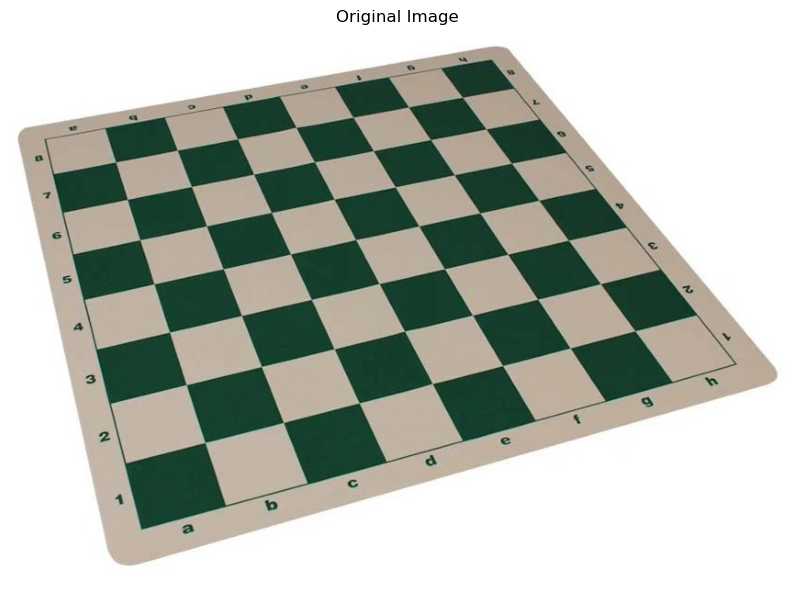

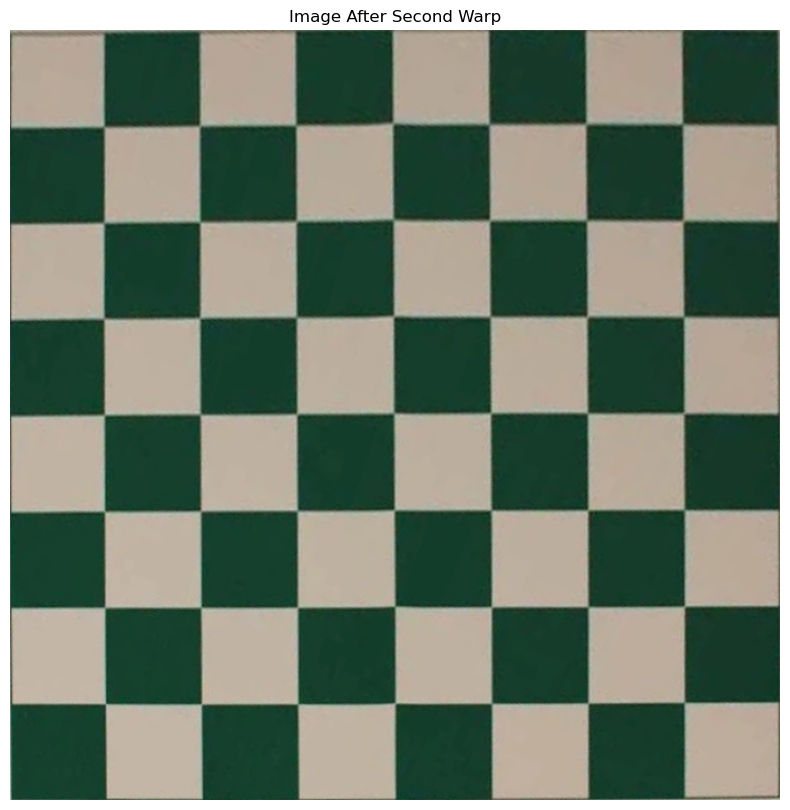

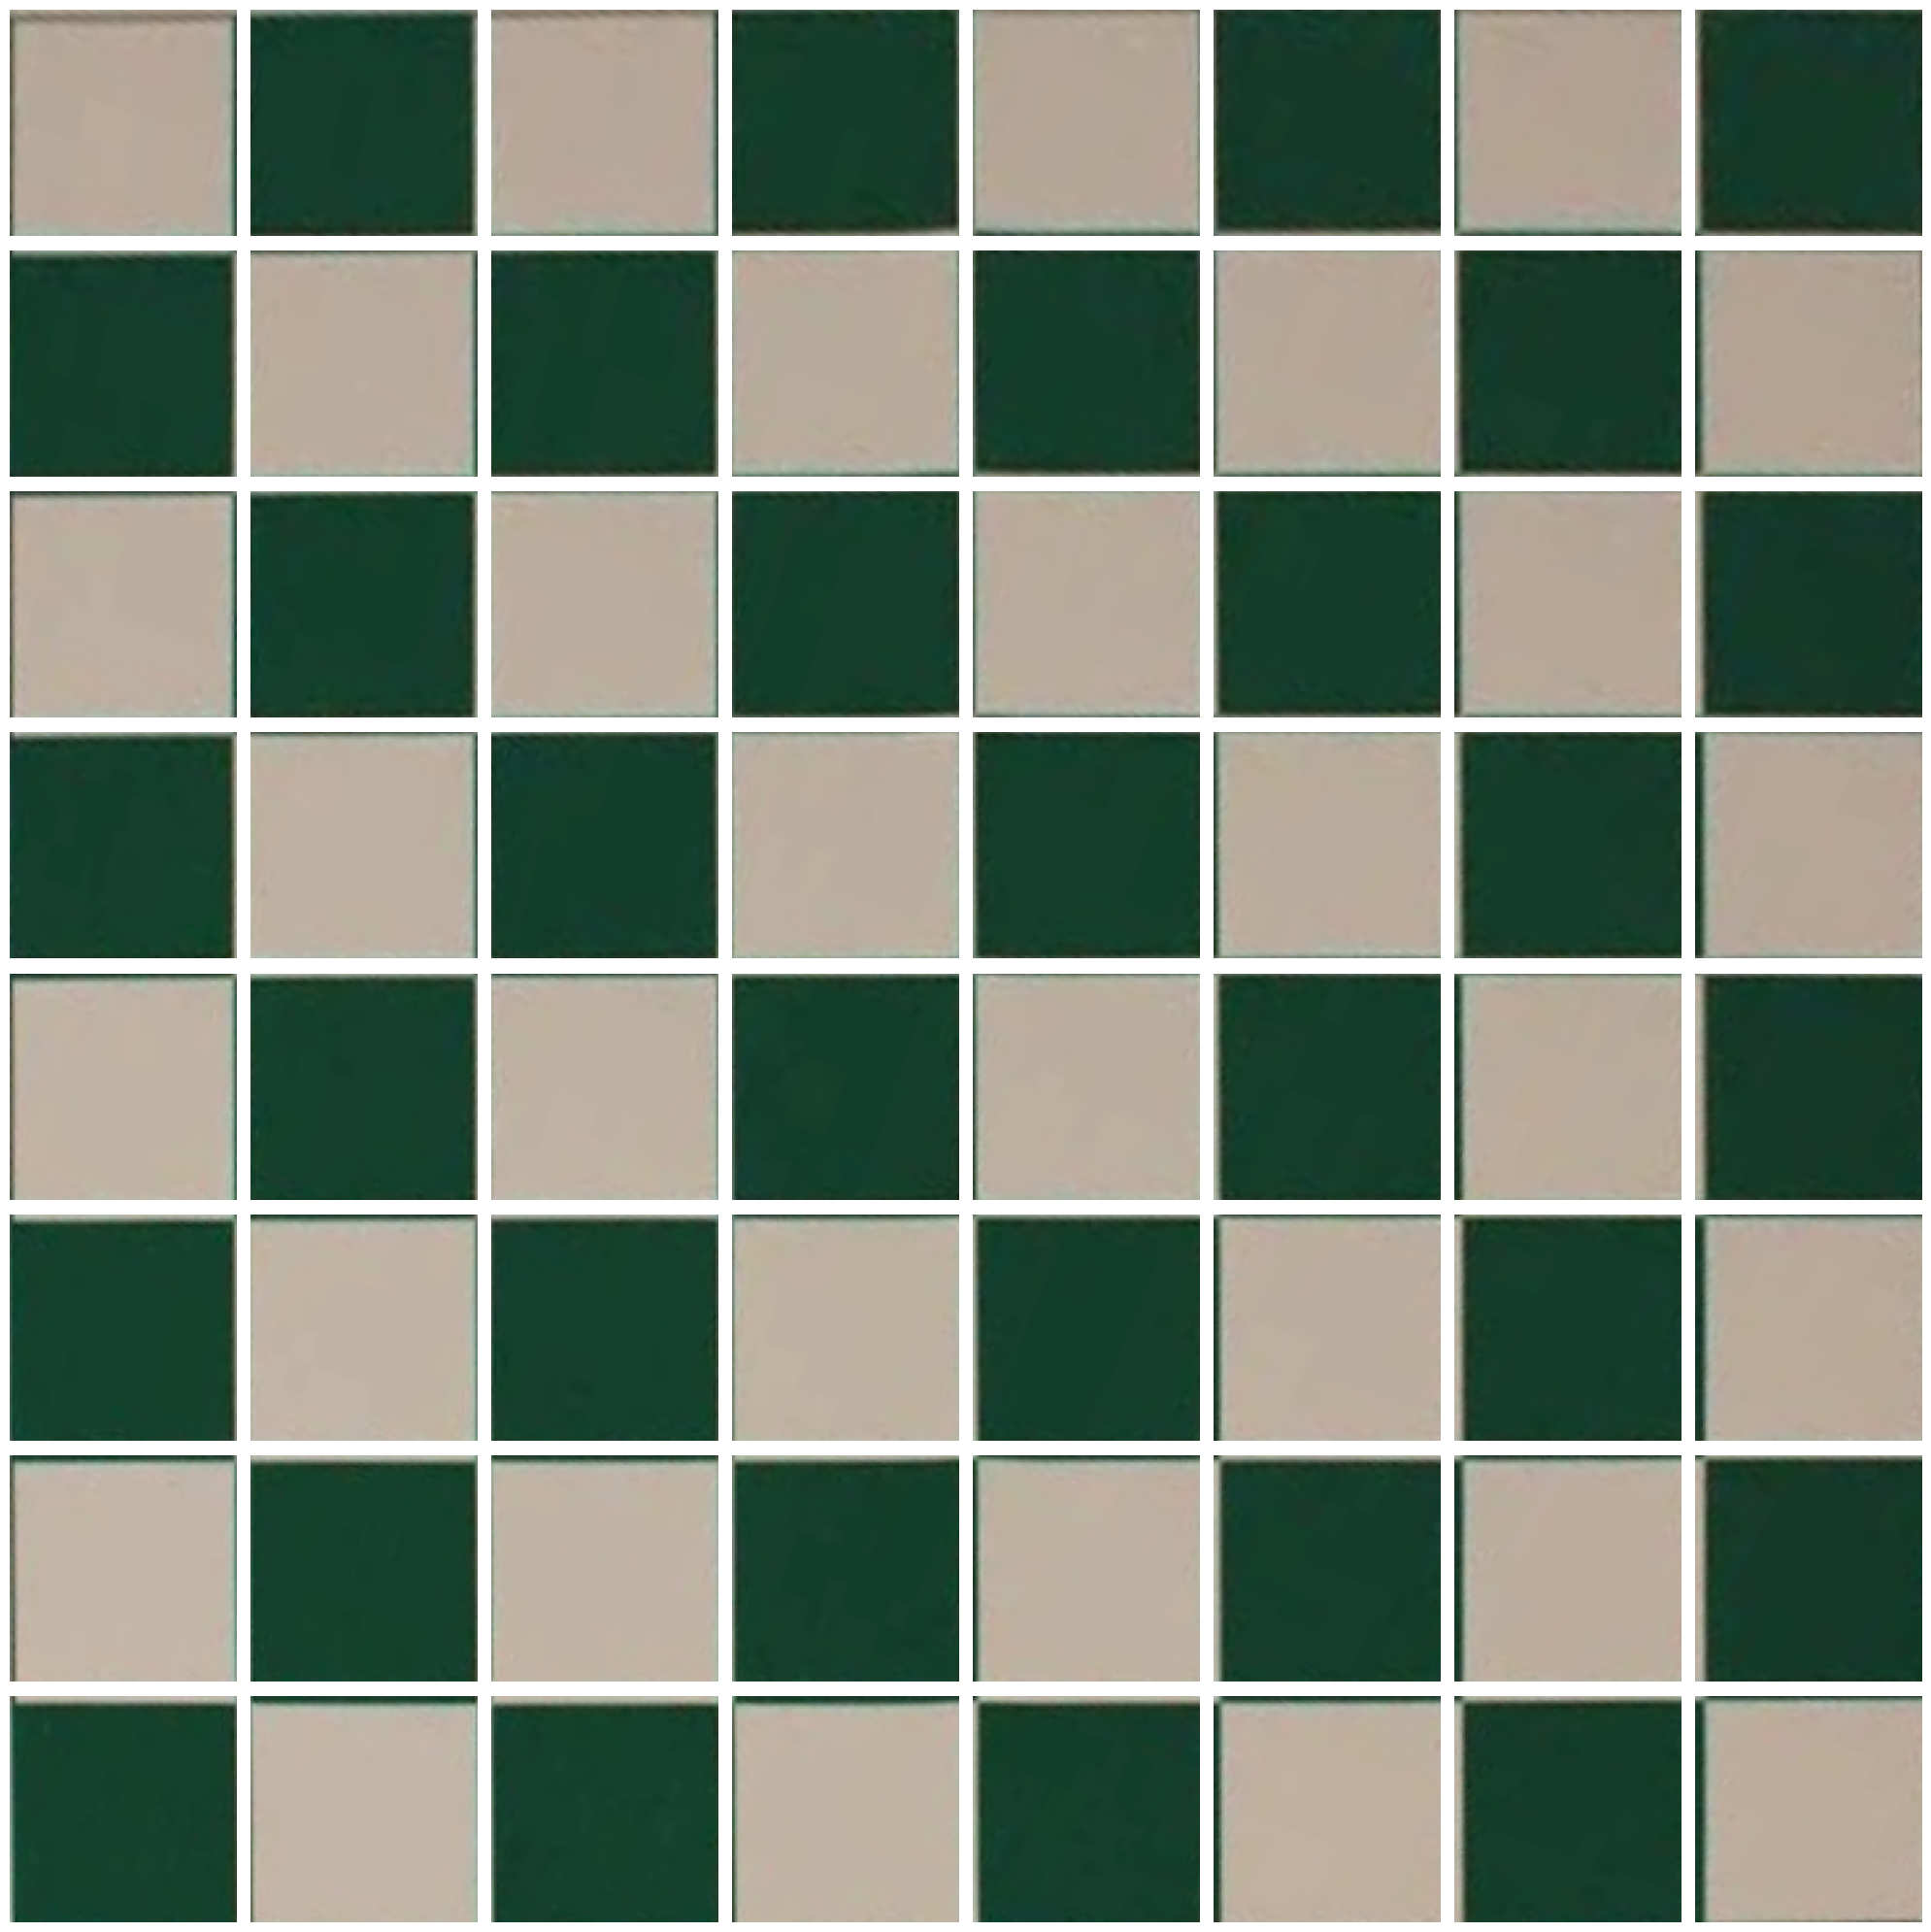

Number of squares: 64
Shape of each square: (86, 86, 3)


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#"C:\\Users\\shrey\\Downloads\\1.jpg"
image_path = "C:\\Users\\shrey\\Downloads\\1.jpg"

def preprocess_image(image):
    if len(image.shape) == 3:
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray = image
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    return blurred

def find_chessboard_contour(image):
    # Apply adaptive thresholding
    adaptive_thresh = cv2.adaptiveThreshold(image, 255, 
                                            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                            cv2.THRESH_BINARY, 11, 2)
    
    # Find contours
    contours, _ = cv2.findContours(adaptive_thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter out the largest contour (the outer border)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[1:]
    
    # Find the contour with the largest area among the inner contours
    if contours:
        max_contour = max(contours, key=cv2.contourArea)
        
        # Approximate the contour to a polygon
        epsilon = 0.02 * cv2.arcLength(max_contour, True)
        approx = cv2.approxPolyDP(max_contour, epsilon, True)
        
        if len(approx) == 4:
            return approx
    
    return None

def apply_perspective_transform(image, contour):
    # Reshape contour to 4x2 array
    pts = contour.reshape(4, 2)
    
    # Determine the top-left, top-right, bottom-right, and bottom-left points
    rect = np.zeros((4, 2), dtype="float32")
    s = pts.sum(axis=1)
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    diff = np.diff(pts, axis=1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    # Get the width and height of the new image
    (tl, tr, br, bl) = rect
    widthA = np.linalg.norm(br - bl)
    widthB = np.linalg.norm(tr - tl)
    heightA = np.linalg.norm(tr - br)
    heightB = np.linalg.norm(tl - bl)
    
    # Use the maximum of width and height to create a square
    maxSize = max(int(widthA), int(widthB), int(heightA), int(heightB))
    
    # Set up the destination points for the perspective transform
    dst = np.array([
        [0, 0],
        [maxSize - 1, 0],
        [maxSize - 1, maxSize - 1],
        [0, maxSize - 1]], dtype="float32")
    
    # Get the perspective transform matrix and apply it
    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxSize, maxSize))
    
    return warped



def divide_into_squares(image):
    height, width = image.shape[:2]
    square_size = height // 8  # Assuming the image is square and has 8x8 grid
    
    squares = []
    for i in range(8):
        for j in range(8):
            top = i * square_size
            left = j * square_size
            square = image[top:top+square_size, left:left+square_size]
            squares.append(square)
    
    return squares

def process_image(image):
    blurred = preprocess_image(image)
    chessboard_contour = find_chessboard_contour(blurred)
    
    if chessboard_contour is not None:
        # Apply perspective transform
        warped = apply_perspective_transform(image, chessboard_contour)
        return warped, chessboard_contour
    else:
        print("No suitable chessboard contour found.")
        return None, None

# Main execution
image = cv2.imread(image_path)
if image is not None:
    # Display original image
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # First pass
    warped1, contour1 = process_image(image)
    if warped1 is not None:
        # Second pass on the warped image
        warped2, contour2 = process_image(warped1)
        if warped2 is not None:
            # Display image after second warp
            plt.figure(figsize=(10, 10))
            plt.imshow(cv2.cvtColor(warped2, cv2.COLOR_BGR2RGB))
            plt.title('Image After Second Warp')
            plt.axis('off')
            plt.show()

            # Divide the final warped image into 64 squares
            squares = divide_into_squares(warped2)
            
            # Display all squares
            fig, axes = plt.subplots(8, 8, figsize=(20, 20))
            for i, square in enumerate(squares):
                row = i // 8
                col = i % 8
                axes[row, col].imshow(cv2.cvtColor(square, cv2.COLOR_BGR2RGB))
                axes[row, col].axis('off')
            
            plt.tight_layout()
            plt.show()
            
            # The 'squares' array now contains all 64 square images
            print(f"Number of squares: {len(squares)}")
            print(f"Shape of each square: {squares[0].shape}")
        else:
            print("Second pass failed to find a chessboard.")
    else:
        print("First pass failed to find a chessboard.")
else:
    print("Failed to load the image.")

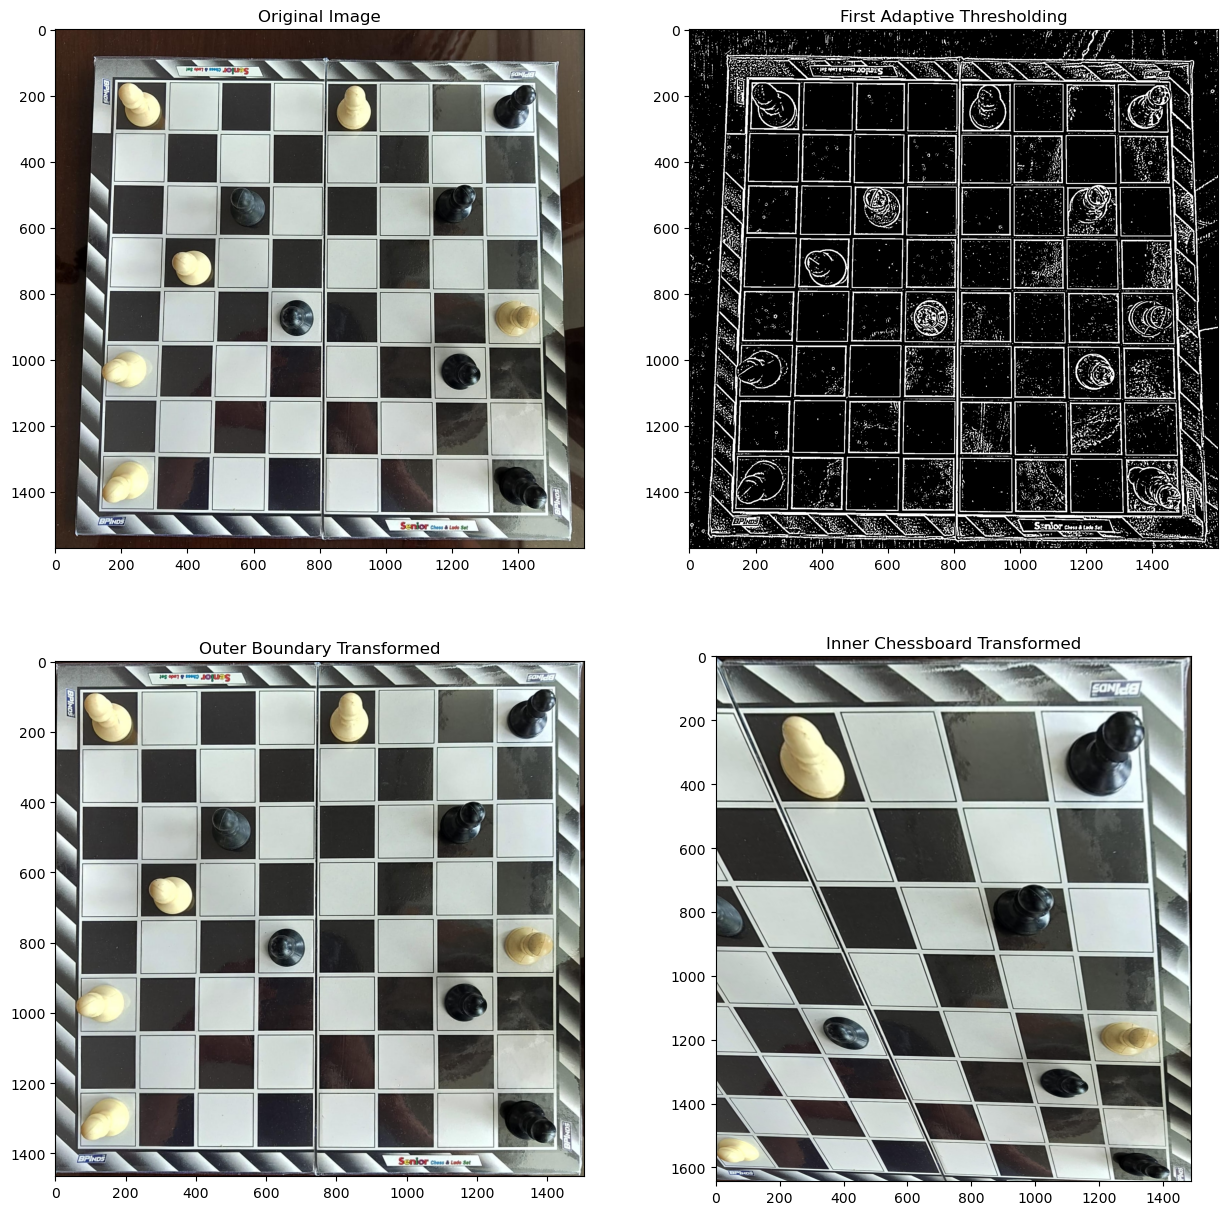

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def find_largest_contour(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    largest_contour = max(contours, key=cv2.contourArea)
    return largest_contour, thresh

def get_transformed_image(image, contour):
    hull = cv2.convexHull(contour)
    epsilon = 0.02 * cv2.arcLength(hull, True)
    approx = cv2.approxPolyDP(hull, epsilon, True)

    if len(approx) != 4:
        rect = cv2.minAreaRect(contour)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
    else:
        box = approx.reshape(4, 2)

    rect = np.zeros((4, 2), dtype="float32")
    s = box.sum(axis=1)
    rect[0] = box[np.argmin(s)]
    rect[2] = box[np.argmax(s)]

    diff = np.diff(box, axis=1)
    rect[1] = box[np.argmin(diff)]
    rect[3] = box[np.argmax(diff)]

    (tl, tr, br, bl) = rect
    widthA = np.linalg.norm(br - bl)
    widthB = np.linalg.norm(tr - tl)
    maxWidth = max(int(widthA), int(widthB))

    heightA = np.linalg.norm(tr - br)
    heightB = np.linalg.norm(tl - bl)
    maxHeight = max(int(heightA), int(heightB))

    dst = np.array([
        [0, 0],
        [maxWidth - 1, 0],
        [maxWidth - 1, maxHeight - 1],
        [0, maxHeight - 1]], dtype="float32")

    M = cv2.getPerspectiveTransform(rect, dst)
    warped = cv2.warpPerspective(image, M, (maxWidth, maxHeight))

    return warped

# Load the image
image_path = "C:\\Users\\shrey\\Downloads\\our pic 2.jpg"
image = cv2.imread(image_path)

# Step 1: Detect the largest contour (outer boundary)
largest_contour, thresh1 = find_largest_contour(image)
outer_transformed_image = get_transformed_image(image, largest_contour)

# Step 2: Detect the largest contour (chessboard) in the transformed image
largest_contour, thresh2 = find_largest_contour(outer_transformed_image)
inner_transformed_image = get_transformed_image(outer_transformed_image, largest_contour)

# Display the images
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title('First Adaptive Thresholding')
plt.imshow(thresh1, cmap='gray')

plt.subplot(2, 2, 3)
plt.title('Outer Boundary Transformed')
plt.imshow(cv2.cvtColor(outer_transformed_image, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.title('Inner Chessboard Transformed')
plt.imshow(cv2.cvtColor(inner_transformed_image, cv2.COLOR_BGR2RGB))

plt.show()


In [19]:
import os
import cv2
import numpy as np
from albumentations import (
    Compose, HorizontalFlip, VerticalFlip, RandomBrightnessContrast,
    RandomRotate90, Blur, RandomCrop, Resize
)

def yolo_to_bbox(yolo_annotation, img_width, img_height):
    x_center, y_center, width, height = map(float, yolo_annotation.split()[1:])
    x1 = (x_center - width / 2) * img_width
    y1 = (y_center - height / 2) * img_height
    x2 = (x_center + width / 2) * img_width
    y2 = (y_center + height / 2) * img_height
    return [x1, y1, x2, y2]

def bbox_to_yolo(bbox, img_width, img_height):
    x1, y1, x2, y2 = bbox
    width = (x2 - x1) / img_width
    height = (y2 - y1) / img_height
    x_center = (x1 + x2) / (2 * img_width)
    y_center = (y1 + y2) / (2 * img_height)
    return [x_center, y_center, width, height]

def augment_yolo_annotations(image_path, annotation_path, output_dir, num_augmentations=5):
    image = cv2.imread(image_path)
    img_height, img_width = image.shape[:2]

    with open(annotation_path, 'r') as f:
        annotations = f.readlines()

    bboxes = [yolo_to_bbox(ann, img_width, img_height) for ann in annotations]
    class_labels = [int(ann.split()[0]) for ann in annotations]

    augmentations = Compose([
        HorizontalFlip(p=0.5),
        VerticalFlip(p=0.5),
        RandomRotate90(p=0.5),
        RandomBrightnessContrast(p=0.5),
        Blur(blur_limit=3, p=0.3),
        RandomCrop(height=img_height, width=img_width, p=0.5),
        Resize(height=img_height, width=img_width, p=1)
    ], bbox_params={'format': 'pascal_voc', 'label_fields': ['class_labels']})

    for i in range(num_augmentations):
        augmented = augmentations(image=image, bboxes=bboxes, class_labels=class_labels)
        aug_image = augmented['image']
        aug_bboxes = augmented['bboxes']
        aug_class_labels = augmented['class_labels']

        # Save augmented image
        aug_image_path = os.path.join(output_dir, f'aug_{i}_{os.path.basename(image_path)}')
        cv2.imwrite(aug_image_path, aug_image)

        # Save augmented annotations
        aug_annotation_path = os.path.join(output_dir, f'aug_{i}_{os.path.basename(annotation_path)}')
        with open(aug_annotation_path, 'w') as f:
            for bbox, class_label in zip(aug_bboxes, aug_class_labels):
                yolo_bbox = bbox_to_yolo(bbox, img_width, img_height)
                f.write(f"{class_label} {' '.join(map(str, yolo_bbox))}\n")

# Usage
input_dir = r"C:\Users\shrey\Downloads\board"
output_dir = r"C:\Users\shrey\Downloads\board_annotations"
os.makedirs(output_dir, exist_ok=True)

for filename in os.listdir(input_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(input_dir, filename)
        annotation_path = os.path.join(input_dir, f"{os.path.splitext(filename)[0]}.txt")
        
        if os.path.exists(annotation_path):
            augment_yolo_annotations(image_path, annotation_path, output_dir)

ModuleNotFoundError: No module named 'albumentations'

In [22]:
import os
import random
from pathlib import Path
import cv2
import numpy as np

# Set paths
image_dir = Path(r"C:\Users\shrey\Downloads\board")
label_dir = Path(r"C:\Users\shrey\Downloads\yolo_annotations")
output_dir = Path(r"C:\Users\shrey\Downloads\board_augmented")
output_dir.mkdir(exist_ok=True)

# Augmentation functions (same as before)
def random_brightness_contrast(image, alpha=1.0, beta=0):
    alpha = random.uniform(0.8, 1.2)
    beta = random.randint(-30, 30)
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def horizontal_flip(image, bboxes):
    flipped_image = cv2.flip(image, 1)
    flipped_bboxes = [[1 - x_center, y_center, w, h] for x_center, y_center, w, h in bboxes]
    return flipped_image, flipped_bboxes

def vertical_flip(image, bboxes):
    flipped_image = cv2.flip(image, 0)
    flipped_bboxes = [[x_center, 1 - y_center, w, h] for x_center, y_center, w, h in bboxes]
    return flipped_image, flipped_bboxes

def rotate90(image, bboxes):
    rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    rotated_bboxes = [[y_center, 1 - x_center, h, w] for x_center, y_center, w, h in bboxes]
    return rotated_image, rotated_bboxes

def blur(image):
    return cv2.GaussianBlur(image, (5, 5), 0)

def augment_and_save(image_path, label_path, output_dir, num_augmentations=3):
    # Read image and labels
    image = cv2.imread(str(image_path))
    
    with open(label_path, 'r') as f:
        lines = f.readlines()
    
    bboxes = []
    class_labels = []
    for line in lines:
        class_id, x, y, w, h = map(float, line.strip().split())
        bboxes.append([x, y, w, h])
        class_labels.append(int(class_id))
    
    # Perform augmentations
    for i in range(num_augmentations):
        aug_image = image.copy()
        aug_bboxes = bboxes.copy()
        
        # Apply random augmentations
        if random.random() < 0.5:
            aug_image = random_brightness_contrast(aug_image)
        if random.random() < 0.5:
            aug_image, aug_bboxes = horizontal_flip(aug_image, aug_bboxes)
        if random.random() < 0.5:
            aug_image, aug_bboxes = vertical_flip(aug_image, aug_bboxes)
        if random.random() < 0.5:
            aug_image, aug_bboxes = rotate90(aug_image, aug_bboxes)
        if random.random() < 0.3:
            aug_image = blur(aug_image)
        
        # Save augmented image
        aug_image_path = output_dir / f"{image_path.stem}_aug{i}{image_path.suffix}"
        cv2.imwrite(str(aug_image_path), aug_image)
        
        # Save augmented labels
        aug_label_path = output_dir / f"{image_path.stem}_aug{i}.txt"
        with open(aug_label_path, 'w') as f:
            for bbox, label in zip(aug_bboxes, class_labels):
                f.write(f"{label} {' '.join(map(str, bbox))}\n")

# Process all images and labels
for image_path in image_dir.glob('*.jpg'):  # Adjust file extension if needed
    label_path = label_dir / f"{image_path.stem}.txt"
    if label_path.exists():
        augment_and_save(image_path, label_path, output_dir)

print("Augmentation completed.")

Augmentation completed.


In [23]:
import os
import shutil
from pathlib import Path

# Set the path to your board_augmented folder
augmented_dir = Path(r"C:\Users\shrey\Downloads\board_augmented")

# Create subfolders for images and labels
images_dir = augmented_dir / "images"
labels_dir = augmented_dir / "labels"

images_dir.mkdir(exist_ok=True)
labels_dir.mkdir(exist_ok=True)

# Move files to their respective folders
for file_path in augmented_dir.iterdir():
    if file_path.is_file():
        if file_path.suffix.lower() == '.jpg':
            shutil.move(str(file_path), str(images_dir / file_path.name))
        elif file_path.suffix.lower() == '.txt':
            shutil.move(str(file_path), str(labels_dir / file_path.name))

print("Files have been organized into subfolders.")

Files have been organized into subfolders.


In [24]:
import os
import shutil
from pathlib import Path

# Set the path to your board_augmented folder
augmented_dir = Path(r"C:\Users\shrey\Downloads\board_augmented")

# Create subfolders for images and labels
images_dir = augmented_dir / "images"
labels_dir = augmented_dir / "labels"

images_dir.mkdir(exist_ok=True)
labels_dir.mkdir(exist_ok=True)

# Initialize counters
image_count = 0
label_count = 0

# Move files to their respective folders and count them
for file_path in augmented_dir.iterdir():
    if file_path.is_file():
        if file_path.suffix.lower() == '.jpg':
            shutil.move(str(file_path), str(images_dir / file_path.name))
            image_count += 1
        elif file_path.suffix.lower() == '.txt':
            shutil.move(str(file_path), str(labels_dir / file_path.name))
            label_count += 1

print("Files have been organized into subfolders.")
print(f"Number of images in the 'images' subfolder: {image_count}")
print(f"Number of text files in the 'labels' subfolder: {label_count}")

# Double-check the counts using list comprehension
image_count_check = len([f for f in images_dir.iterdir() if f.is_file()])
label_count_check = len([f for f in labels_dir.iterdir() if f.is_file()])

print(f"Verified number of images: {image_count_check}")
print(f"Verified number of label files: {label_count_check}")

if image_count != image_count_check or label_count != label_count_check:
    print("Warning: There's a discrepancy in the file counts. Please check manually.")

Files have been organized into subfolders.
Number of images in the 'images' subfolder: 0
Number of text files in the 'labels' subfolder: 0
Verified number of images: 51
Verified number of label files: 51


In [25]:
path: C:/Users/shrey/Downloads/board_augmented
train: images
val: images

nc: 1  # number of classes
names: ['chess-board']  # class names


SyntaxError: invalid syntax (1627594080.py, line 1)